<a href="https://colab.research.google.com/github/3B032013/2025_DL_hws/blob/main/hw5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一、資料預處理

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 下載IMDB

In [ ]:
import urllib.request
import os
import tarfile

In [ ]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="data/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

downloaded: ('data/aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x7cd1630f8b90>)


## 2. 解壓縮檔案

In [ ]:
if not os.path.exists("data/aclImdb"):
    tfile = tarfile.open("data/aclImdb_v1.tar.gz", 'r:gz')
    result=tfile.extractall('data/')

## 3. 檢視資料夾data/acllmdb內檔案


















test (影評25000篇，測試用)

*   neg: 有12500篇負面影評文字檔
*   pos: 有12500篇正面影評文字檔


train (影評25000篇，訓練用)

*   neg: 有12500篇負面影評文字檔
*   pos: 有12500篇正面影評文字檔

## 4. 匯入文字資料預處理模組

In [ ]:
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

## 5. 定義rm_tags(text)函數

In [ ]:
import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)

## 6. 定義 read_files(filetype)函數

In [ ]:
import os
def read_files(filetype):
    path = "data/aclImdb/"
    file_list=[]

    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]

    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]

    print('read',filetype, 'files:',len(file_list))

    all_labels = ([1] * 12500 + [0] * 12500)

    all_texts  = []
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]

    return all_labels,all_texts

## 7. 建立訓練與測試資料

In [ ]:
y_train,train_text=read_files("train")
y_test,test_text=read_files("test")

read train files: 25000
read test files: 25000


## 8.利用tokenizer建立字典

In [ ]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(train_text)

## 9.轉換每篇影評(文字串)為一連串的數字(數字串)

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(train_text)
x_test_seq  = tokenizer.texts_to_sequences(test_text)

In [ ]:
print(train_text[0])

This movie is by far one of my favorites. I saw it while in college in the early 90's, and while I couldn't identify with the thirtysomethings in the film, I felt that the story, characters, and movie in general were top notch. To the people who spoke negatively of Indian Summer, feel free to stick to your overblown Armageddon-type movies and leave the movies with a great, wholesome story to those who can appreciate them.


## 10. 完成x_train與x_test的建立：使每篇影評的數字串長度相同

In [ ]:
x_train = sequence.pad_sequences(x_train_seq, maxlen=100)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=100)

In [ ]:
print('before pad_sequences length=',len(x_train_seq[0]))
print(x_train_seq[0])

before pad_sequences length= 67
[10, 16, 6, 30, 226, 27, 4, 57, 9, 215, 8, 133, 7, 1166, 7, 1, 398, 2, 133, 9, 422, 15, 1, 7, 1, 18, 9, 416, 11, 1, 61, 101, 2, 16, 7, 825, 67, 346, 5, 1, 80, 33, 4, 1392, 1496, 230, 874, 5, 1225, 5, 125, 548, 98, 2, 559, 1, 98, 15, 3, 83, 61, 5, 144, 33, 66, 1140, 94]


## 11. 轉換x_train, x_test, y_train, y_test為numpy array

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 100)
(25000, 100)
(25000,)
(25000,)


# 二、神經網路模型訓練

## 1. 讀入所需套件

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

## 2. 神經網路模型建立

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=32, input_length=100))
# Embedding層參數個數 = 輸入大小*輸出大小
            = 2000*32
            = 64000

model.add(LSTM(128))
# LSTM層參數個數 = 4*(((輸入大小+輸出大小)*輸出大小)+輸出大小)
         = 4*(((32+128)*128)+128)
         = 82432

model.add(Dense(1, activation='sigmoid'))
# Dense層參數個數 = (輸入*輸出)+輸出
          = (128*1)+1
          = 129

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## 3. 組裝神經網路

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 4. 檢視模型

In [ ]:
model.build(input_shape=(None, 100))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 32)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,561 (572.50 KB)

 Trainable params: 146,561 (572.50 KB)

 Non-trainable params: 0 (0.00 B)

## 5. 訓練模型

In [ ]:
train_history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# 總共25000筆資料，切出20%做驗證資料
# 用來訓練的資料為20000筆 每批次32筆
# 所以一次訓練共625批次
# input shape(32,100)
# output shape(32,1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7223 - loss: 0.5437 - val_accuracy: 0.8486 - val_loss: 0.4198
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8571 - loss: 0.3426 - val_accuracy: 0.7726 - val_loss: 0.5371
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8788 - loss: 0.2937 - val_accuracy: 0.7536 - val_loss: 0.5539
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8910 - loss: 0.2694 - val_accuracy: 0.6690 - val_loss: 0.6937
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9003 - loss: 0.2468 - val_accuracy: 0.8270 - val_loss: 0.4465
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9090 - loss: 0.2264 - val_accuracy: 0.7574 - val_loss: 0.6410
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9221 - loss: 0.1996 - val_accuracy: 0.7564 - val_loss: 0.6060
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9284 - loss: 0.1851 - val_accuracy:

## 6. 以圖型顯示準確率(accuracy)與損失(loss)

In [ ]:
# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

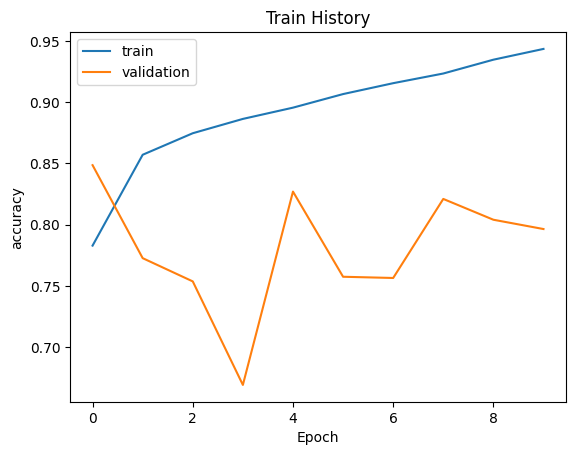

In [ ]:
# 準確率accuracy
show_train_history(train_history,'accuracy','val_accuracy')

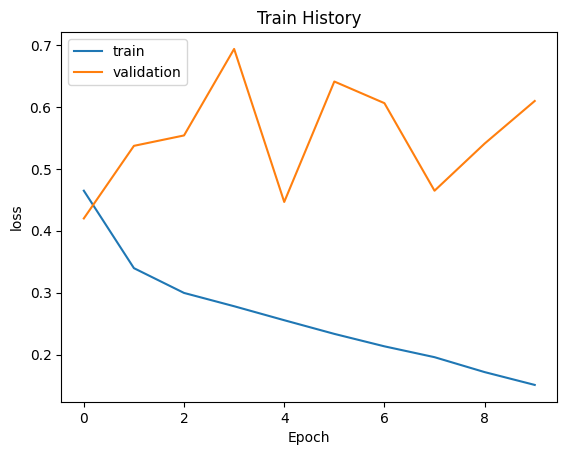

In [ ]:
# 損失誤差loss
show_train_history(train_history,'loss','val_loss')

## 7. 評估模型準確率

In [ ]:
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=',scores[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8671 - loss: 0.3800

accuracy= 0.8374800086021423


## 8.儲存模型與權重

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks'
model_json = model.to_json()
open('imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('imdb_model.weights.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


## 9. 儲存Tokenizer

In [ ]:
# 存檔前，請先確定有SaveModel資料夾
import pickle
f = open('SaveModel/imdb_tokenizer_2000.pkl', 'wb')
pickle.dump(tokenizer, f)
f.close()